In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from os import listdir
from sklearn.preprocessing import StandardScaler
import umap

In [2]:
# taxfiles = listdir('../../MOTUS_TAX/')
# tax_values = []; samples = [];
# for f in taxfiles:
#     temp = pd.read_csv('../../MOTUS_TAX/'+f,skiprows=2,sep='\t')
#     tax_values.append(list(temp['unnamed sample']))
#     samples.append(f.split('_')[0])
# temp = pd.read_csv('../../MOTUS_TAX/A10_tax.txt',skiprows=2,sep='\t')
# taxnames = [ x for x in list(temp['#consensus_taxonomy'])]


# oral_tax = pd.DataFrame(zip(taxnames),columns=['Species'])
# for i in range(len(samples)):
#     oral_tax[samples[i]]=tax_values[i]
    
# oral_tax = oral_tax.set_index(['Species'])
# oral_tax = oral_tax.loc[(oral_tax !=0).any(axis=1)]
# oral_tax.to_csv('../data/metagenome/motus_profile.csv')

# Differential analysis for species-level microbial abundance

In [10]:
# from pydeseq2.dds import DeseqDataSet
# from pydeseq2.default_inference import DefaultInference
# from pydeseq2.ds import DeseqStats

In [9]:
# oral_tax = pd.read_csv('../data/metagenome/motus_profile.csv')
# spnames = [ x.split('[ref')[0].split('[meta')[0].split('[ext')[0].\
#            replace('[','').replace(']','').strip() for x in list(oral_tax['Species'])]
# oral_tax['Species'] = spnames
# oral_tax = oral_tax.rename(columns={'Species':'Sample'})

# meta = pd.DataFrame(zip(list(oral_tax.columns)[1:], 
#                     ['A' for i in range(10)] + ['B' for i in range(10)] ), columns=['Sample','Group'])
# meta = meta.set_index('Sample')
# oral_tax = oral_tax.set_index(['Sample'])
# for k in oral_tax.columns:
#     temp = [ int(x*1e5) for x in list(oral_tax[k]) ]
#     oral_tax[k] = temp
# oral_tax = oral_tax.T
# oral_quant = oral_tax.groupby(oral_tax.columns, axis=1).sum()

# inference = DefaultInference()
# dds = DeseqDataSet( counts= oral_quant, metadata= meta,
#     design_factors="Group", refit_cooks=True,ref_level= ["Group", "A"], inference=inference )

In [8]:
# dds.deseq2()
# print(dds)

In [7]:
# diffanalysis = DeseqStats(dds,contrast= ['Group', 'B', 'A'], inference=inference)
# diffanalysis.summary()

In [6]:
# diffanalysis.results_df.to_csv("../data/metagenome/sps_deg.csv")

In [2]:
def volcano( table, lfc_col, pv_col, lfc_cutoff, pv_cutoff, size, ax):
    lfc_list = list(table[lfc_col])
    mlg10pv = [ -np.log10(x) for x in list(table[pv_col]) ]
    x_cut1 = lfc_cutoff; x_cut2 = - lfc_cutoff;
    y_cut = -np.log10( pv_cutoff )
    color_list = []
    for i in range(len(lfc_list) ):
        if mlg10pv[i] > y_cut:
            if lfc_list[i] > x_cut1:
                color_list.append('red')
            elif lfc_list[i] < x_cut2:
                color_list.append('blue')
            else:
                color_list.append('grey')
        else:
            color_list.append('grey')
    ax.scatter(lfc_list, mlg10pv, c=color_list, marker='o',linewidth=0.5,edgecolor='black',s=size, alpha=0.5)
    ax.axhline(y=y_cut, color='grey', linestyle='--')
    ax.axvline(x=x_cut1, color='grey', linestyle='--')
    ax.axvline(x=x_cut2, color='grey', linestyle='--')
    return ax

def annot_volcano( table, name_col, lfc_col, pv_col, lfc_cutoff, pv_cutoff, fontsize, ax ):
    x_cut1 = lfc_cutoff; x_cut2 = - lfc_cutoff;
    y_cut = -np.log10( pv_cutoff )
    
    sig_table = table[ ( (table[lfc_col]>x_cut1) | (table[lfc_col]<x_cut2) ) & (table[pv_col]<pv_cutoff)  ]
    sig_table = sig_table.reset_index().drop(['index'],axis=1)
    x_list = list(sig_table[lfc_col])
    y_list = [ -np.log10(x) for x in list(sig_table[pv_col]) ]
    names = list(sig_table[name_col])
    
    for i in range(len(x_list)):
        if x_list[i] >0:
            ax.text(0.9*x_list[i], y_list[i]*0.99, s=names[i], fontsize=fontsize)
        else:
            ax.text(1.01*x_list[i], y_list[i]*0.99, s=names[i], fontsize=fontsize)   
    return ax

In [20]:
spdeg = pd.read_csv('../data/metagenome/sps_deg.csv')
spdeg= spdeg.rename(columns={'Sample':'Species'})
spdeg = spdeg.dropna()

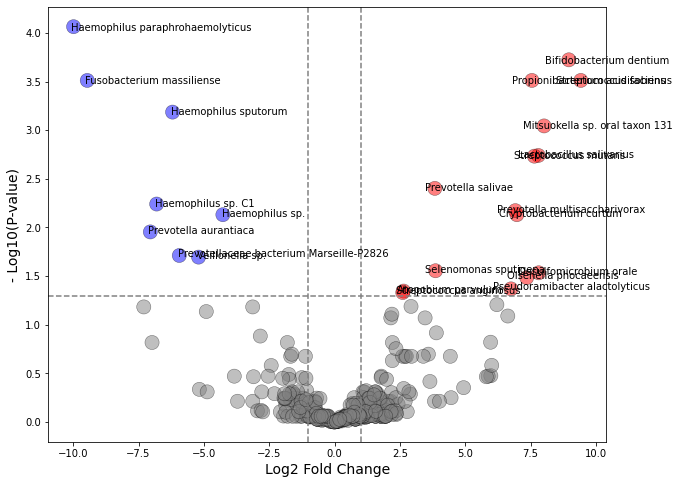

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
volcano( spdeg, 'log2FoldChange', 'padj', 1.0, 0.05, 200, ax=ax)
ax.set_xlabel('Log2 Fold Change',fontsize=14)
ax.set_ylabel('- Log10(P-value)',fontsize=14)
annot_volcano( spdeg,'Species' ,'log2FoldChange', 'padj', 1.0, 0.05, 10, ax=ax );
ax.

# UMAP

In [29]:
oral_tax = pd.read_csv('../data/metagenome/motus_profile.csv')
spnames = [ x.split('[ref')[0].split('[meta')[0].split('[ext')[0].\
           replace('[','').replace(']','').strip() for x in list(oral_tax['Species'])]
oral_tax['Species'] = spnames; oral_tax = oral_tax.rename(columns={'Species':'Sample'})
oral_tax = oral_tax.set_index(['Sample'])
oral_tax = oral_tax.T; oral_quant = oral_tax.groupby(oral_tax.columns, axis=1).sum();
threshold = pd.read_csv('../data/metagenome/Thresholds.csv')
oral_quant.head()

Sample,Abiotrophia defectiva,Acidaminococcus species incertae sedis,Acidovorax wautersii,Acinetobacter baumannii,Actinobacteria sp.,Actinobaculum sp. oral taxon 183,Actinomyces bouchesdurhonensis,Actinomyces dentalis,Actinomyces gerencseriae,Actinomyces graevenitzii,...,Veillonella denticariosi,Veillonella dispar,Veillonella parvula,Veillonella rogosae,Veillonella sp.,Veillonella species incertae sedis,Veillonella tobetsuensis,Weissella confusa,Weissella paramesenteroides,unassigned
A10,0.000198,0.0,0.0,0.000000,0.003645,0.000081,0.000000,0.000277,0.000086,0.005495,...,0.0,0.002468,0.001105,0.041786,0.001101,0.003468,0.004988,0.0,0.0,0.071457
A11,0.000440,0.0,0.0,0.000000,0.008368,0.000030,0.016645,0.000115,0.000046,0.016826,...,0.0,0.015411,0.003669,0.000787,0.000278,0.039186,0.000157,0.0,0.0,0.034749
A1,0.010644,0.0,0.0,0.000000,0.003527,0.000910,0.000000,0.000773,0.000822,0.001720,...,0.0,0.001753,0.003181,0.011843,0.013361,0.006406,0.002494,0.0,0.0,0.043114
A20,0.000000,0.0,0.0,0.000672,0.008431,0.001276,0.000000,0.001029,0.001319,0.004478,...,0.0,0.004752,0.022527,0.007487,0.002804,0.016425,0.000000,0.0,0.0,0.035508
A28,0.003256,0.0,0.0,0.000000,0.001518,0.000587,0.000000,0.000649,0.000553,0.000000,...,0.0,0.000752,0.003571,0.018238,0.001710,0.003183,0.001323,0.0,0.0,0.042862


In [34]:
X = oral_tax.iloc[:,1:].values
X = StandardScaler().fit_transform(X)
reducer_sp = umap.UMAP(random_state=42)
embedding = reducer_sp.fit_transform(X)
umap_pd = pd.DataFrame(embedding, columns =['UMAP-1','UMAP-2'])
umap_pd['Group'] = ['A (20~30yr)' for i in range(10)] + ['B (55~80yr)' for i in range(10)]

/home/bras5181/miniconda3/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


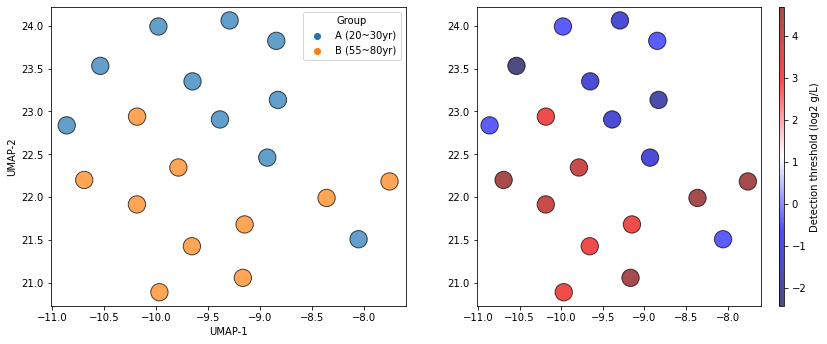

In [35]:
fig, axs = plt.subplots(1,2,figsize=(14,5.5))
sns.scatterplot(x='UMAP-1', y='UMAP-2',hue="Group",
            linewidth=1,data=umap_pd, s=300, alpha=0.7, edgecolor='black', ax=axs[0])
pt1=axs[1].scatter( umap_pd['UMAP-1'], umap_pd['UMAP-2'], c=np.log2(threshold['Detection threshold']), 
                   cmap='seismic',alpha=0.7,s=300, edgecolor='black')
plt.colorbar(pt1, label='Detection threshold (log2 g/L)', aspect=50)

# Network (top50)
## species-species
## species-metabolite

In [41]:
from scipy.stats import kendalltau, pearsonr, spearmanr
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]
def sig_pv(x):
    if x <= 0.05:
        return 1
    return 0

In [58]:
sum( oral_quant.sum(axis=0).sort_values(ascending=False).iloc[:101] )/20

0.8550441795349997

In [46]:
sum(oral_quant.sum(axis=0).sort_values(ascending=False))

20.000000001

In [57]:
oral_quant.sum(axis=0).sort_values(ascending=False)[-1]

2.85956e-05

In [42]:
species = list(oral_quant.columns)
sp_corr = oral_quant.corr(method='pearson')
sig_pd = oral_quant.corr( method= pearsonr_pval )

KeyboardInterrupt: 